<a href="https://colab.research.google.com/github/Tendo15/MscDataObservations/blob/main/Spring_of_Weather_Observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# 1. EXPLORATORY DATA ANALYSIS

In [45]:
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/ColabNotebooks2024/Disso24/flight_data.csv')

#Check the shape of the dataset
print(dataset.shape)

#Select the datetime and the temp column
weather_obs=dataset[["Date","Temperature_Celsius"]]
weather_obs.head(10)

(10000, 9)


,Date,Temperature_Celsius
0,2024-10-11,35
1,2024-01-20,3
2,2024-12-26,20
3,2024-08-19,33
4,2024-12-07,28
5,2024-09-09,28
6,2024-10-27,33
7,2024-11-24,19
8,2024-08-12,-15
9,2024-09-03,7


# Dataset details


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight_ID            10000 non-null  int64 
 1   Date                 10000 non-null  object
 2   Time                 10000 non-null  object
 3   Departure_Airport    10000 non-null  object
 4   Arrival_Airport      10000 non-null  object
 5   Temperature_Celsius  10000 non-null  int64 
 6   Wind_Speed_knots     10000 non-null  int64 
 7   Turbulence_Level     10000 non-null  object
 8   Visibility_km        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.2+ KB


# Column Types

In [47]:
weather_obs=dataset[["Date","Temperature_Celsius"]]
weather_obs.head(10)

,Date,Temperature_Celsius
0,2024-10-11,35
1,2024-01-20,3
2,2024-12-26,20
3,2024-08-19,33
4,2024-12-07,28
5,2024-09-09,28
6,2024-10-27,33
7,2024-11-24,19
8,2024-08-12,-15
9,2024-09-03,7


# Missing Values

In [48]:
print('Total number of missing values =', weather_obs.isna().sum().sum())
print("""""")
vars_with_missing = []
for feature in weather_obs.columns:
    missings = weather_obs[feature].isna().sum()

    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / weather_obs.shape[0]
        print('Feature {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} features with missing values'.format(len(vars_with_missing)))

Total number of missing values = 0

In total, there are 0 features with missing values


# Duplicate Values

In [49]:
weather_obs.duplicated().sum()

2055

In [50]:
from IPython.display import display
display(weather_obs.head(5))
display(weather_obs.tail(5))

,Date,Temperature_Celsius
0,2024-10-11,35
1,2024-01-20,3
2,2024-12-26,20
3,2024-08-19,33
4,2024-12-07,28


,Date,Temperature_Celsius
9995,2024-10-17,-15
9996,2024-11-16,-8
9997,2024-07-23,9
9998,2024-05-19,-11
9999,2024-10-26,24


In [51]:
weather_obs.describe()

,Temperature_Celsius
count,10000.000000
mean,10.314800
std,17.594467
min,-20.000000
25%,-5.000000
50%,11.000000
75%,25.000000
max,40.000000


In [52]:
#Output the maximum and minimum temperature date
print(weather_obs.loc[weather_obs["Temperature_Celsius"]== weather_obs["Temperature_Celsius"].max()])
print(weather_obs.loc[weather_obs["Temperature_Celsius"]== weather_obs["Temperature_Celsius"].min()])

            Date  Temperature_Celsius
120   2024-05-02                   40
234   2024-04-24                   40
274   2024-09-04                   40
280   2024-09-27                   40
339   2024-05-24                   40
...          ...                  ...
9738  2024-07-24                   40
9745  2024-11-23                   40
9755  2024-02-20                   40
9856  2024-01-17                   40
9876  2024-02-04                   40

[176 rows x 2 columns]
            Date  Temperature_Celsius
35    2024-10-03                  -20
91    2024-06-04                  -20
164   2024-10-12                  -20
227   2024-12-22                  -20
293   2024-05-06                  -20
...          ...                  ...
9598  2024-05-17                  -20
9623  2024-06-03                  -20
9672  2024-05-04                  -20
9714  2024-05-28                  -20
9810  2024-05-03                  -20

[168 rows x 2 columns]


# Observations:


*   In a few months such as May,April, September, July, January February and November 2024 there was an experience of high Tempretures of 40 degree celcius. In the USA states these months are predominatly WINTER and AUTUMN.  
*   Whareas, in the months of October,may, June and December the minum degrees celcius of -20 occured the most. These seasons are SPRING and WINTER.



#SELECTION OF WINTER DATES

In [56]:
# Select the subset data from 24-12-01 to 25-02-28
mask = (weather_obs['Date'] >= '2024-03-01') & (weather_obs['Date'] <= '2024-05-31')
weather_obs = weather_obs.loc[mask]

# Reset the index
weather_obs.set_index("Date", inplace=True)

# Inspect first 5 rows and last 5 rows of the data
from IPython.display import display
display(weather_obs.head(5))
display(weather_obs.tail(5))

,Temperature_Celsius
Date,
2024-05-03,17
2024-03-19,12
2024-05-24,-12
2024-03-09,-5
2024-03-19,-16


,Temperature_Celsius
Date,
2024-04-24,23
2024-03-23,21
2024-04-18,-14
2024-05-21,7
2024-05-19,-11


In [57]:
weather_obs.describe()

,Temperature_Celsius
count,2520.000000
mean,10.090079
std,17.528274
min,-20.000000
25%,-5.000000
50%,10.000000
75%,25.000000
max,40.000000


# Data Visualization

Time series plot

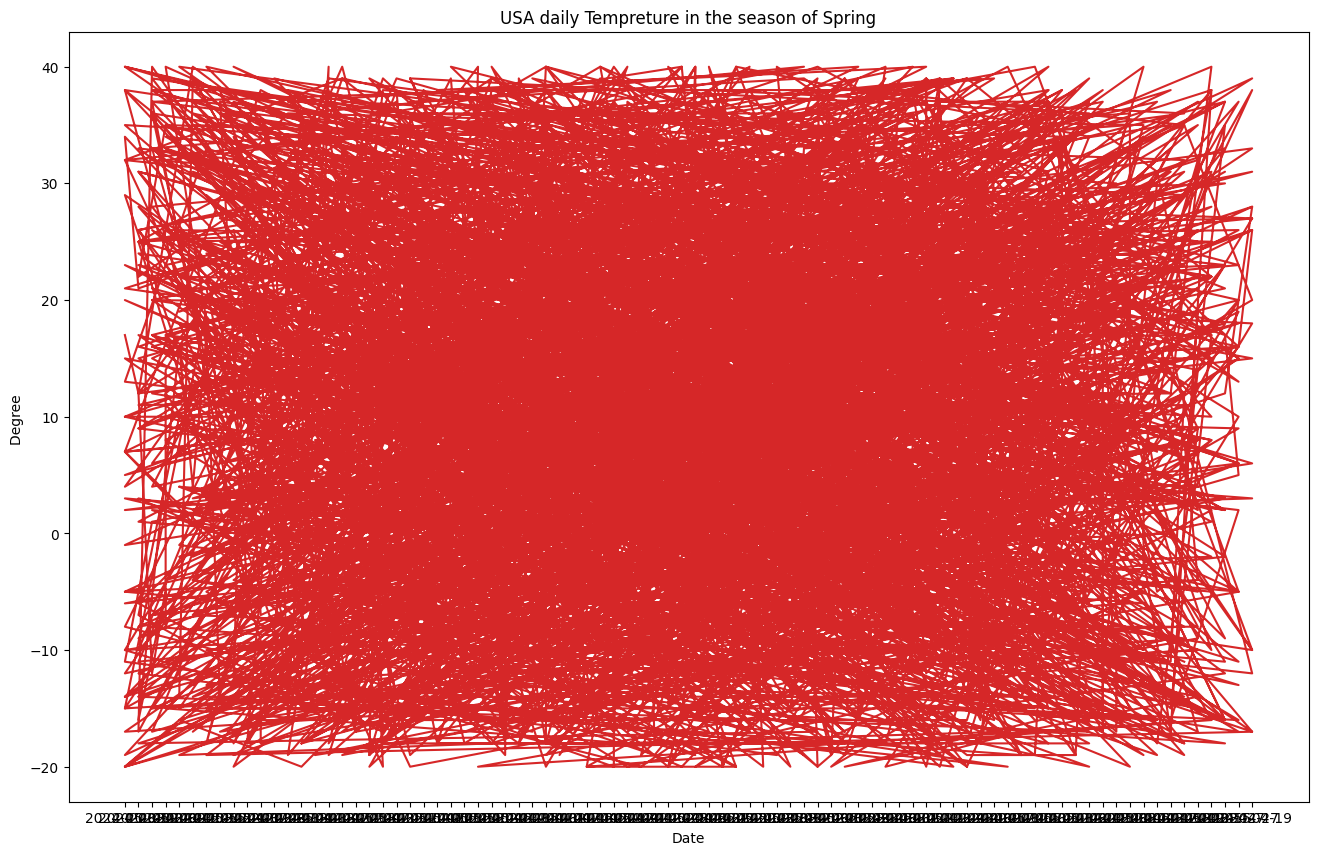

In [58]:
#Plot the daily temperature
plt.figure(figsize=(16,10), dpi=100)
plt.plot(weather_obs.index, weather_obs.Temperature_Celsius, color='tab:red')
plt.gca().set(title='USA daily Tempreture in the season of Spring' , xlabel='Date', ylabel="Degree ")
plt.show()

# 2. DATA PRE-PROCESSING

# Data split Train and Test